#  An Analysis of the Impact of Household Size on Carbon Footprints

## Set Up

In this project, we will examine first: the relationship between the six emission sources and the total, then between the six and Per Capita emissions. This will be the basis for further research pertaining to the impact of household size on carbon footprints

I am choosing to analyze all the variables in the dataset, which in this case are the six explanatory variables (Coal, Oil, Gas, Cement, Flaring and Other), as well as the year which is an independent variable, in order to examine the two dependent variables (Total and Per Capita emissions).

I have decided to choose the six emission sources since through them we can get a better understanding of the composition of the emissions, which can be used to provide more useful results by the end of the study. If cement is main source of emissions in countries with a high emissions per capita, wealthier governments should perhaps switch their priorities from focusing on energy sources to switching the material used in construction.

Inutitively all the emission sources should have a positive effect on total emissions, as total emissions is equal to the sum of the other emissions, however we will explore whether an increase in the emissions of one source actually decreases the emissions of other sources to the extent where the variable has a null or negative effect on total transmissions. 

After processing the data, one can conclude that the year, despite not being explanatory, tends to have a positive correlation with total and per capita emissions due to the economic development that most countries have gone through in the 271 year period the data covers.

Once a breakdown of the carbon emissions data is created we can differentiate between the different carbon emission sources (how each of them affects the total) and can move onto how household size changes the emissions and emission sources.

## Introduction

Given the current climate emergency that has been afflicting the planet there has been a growing interest in using data to identify the most effective solutions to mitigate the effects of the changing temperatures. This current paper will be a part of a series of papers exploring the issue, specifically in the realm of city planning and how good urbanization may lead to lower carbon emissions without necessarily requiring the degrowth policies many politicians fear espousing. 

In this paper, I will analyze data recovered from the Global Carbon Project, to determine the general distribution of carbon emissions across countries, across time periods and the correlation each of them have with total emissions.

# Data Cleaning

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pandas.plotting import scatter_matrix
from scipy.stats import linregress



## Importing the Data

In [2]:
emissions_data=pd.read_csv('Emissions.csv')


In [3]:
emissions_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


## Data Cleaning
### Here we are switching NaN values to zero to make them easier to manipulate and then we're eliminating all rows where the total emissions is 0, to ensure the data is not skewed leftwards.

In [4]:
emissions_data.fillna(0, inplace=True)
emissions_data_clean = emissions_data[emissions_data['Total'] != 0]
emissions_data_clean


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
199,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.000000,0.000000,0.000000,0.000000,0.011266
201,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.000000,0.000000,0.000000,0.000000,0.012098
202,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.000000,0.000000,0.000000,0.000000,0.011946
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.000000,0.000000,0.000000,0.000000,0.013685
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


## Finding the Summary Statistics

In [5]:
summary_stats = emissions_data_clean[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring", "Other", "Per Capita"]].describe(percentiles=[0.2, 0.4, 0.6, 0.8]) 
summary_stats

,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,160.107852,74.129147,55.812023,23.418705,4.154208,1.701091,0.817682,3.859481
std,1398.498004,599.625528,519.270976,247.227495,49.278876,16.670896,11.044686,16.367617
min,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,0.252816,0.000000,0.040304,0.000000,0.000000,0.000000,0.000000,0.000000
40%,1.677927,0.032939,0.474898,0.000000,0.000000,0.000000,0.000000,0.363348
50%,3.605832,0.275102,1.047904,0.000000,0.010903,0.000000,0.000000,0.829750
60%,7.746593,1.132176,2.275344,0.000000,0.101610,0.000000,0.000000,1.686489
80%,43.744429,12.133374,14.274211,1.919097,0.869871,0.000000,0.000000,5.682274
max,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


The chart above indicates the prevalence of different co2 emissions with coal being the highest emitter among all sources, followed by oil, gas, cement, other and flaring. This we can determine by looking at the *mean* column; given all sources are represented the same amount of times, the mean can be used to rank the different source emissions by contribution to total emissions, across time.

The standard deviation for every variable is also several orders of magnitude larger than the means per variable, this means that there has been significant variation in the emission numbers and it would therefore be difficult to fit the emissions accurately to a linear regression.

In addition, if we compare the means of the different variables to their values at the different percentiles, we can see that in almost every case (save Per Capita emissions) the 80th percentile is still lower than the mean. This means that relatively few data points are responsible for affecting the total amount of emissions of every variable (including total emissions). In other words, this means there's a big inequality in the emissions from every source and if we look at the graph below we'll be able to see that it's due to an exponential increase in emissions (from every source) in the past century$^{2}$
.



### $^{2}$ Graphs displaying exponential increase in emissions from different sources, in total and per capita


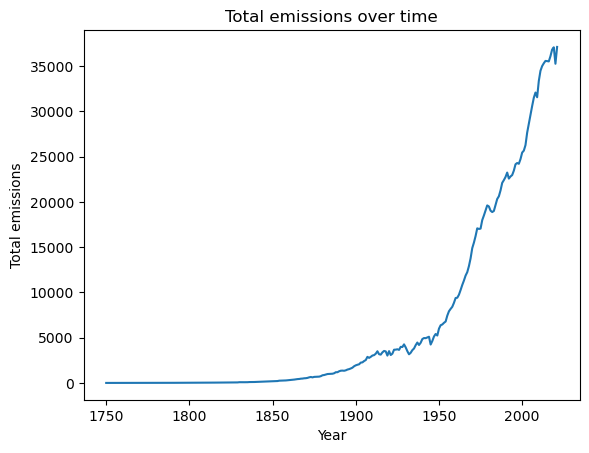

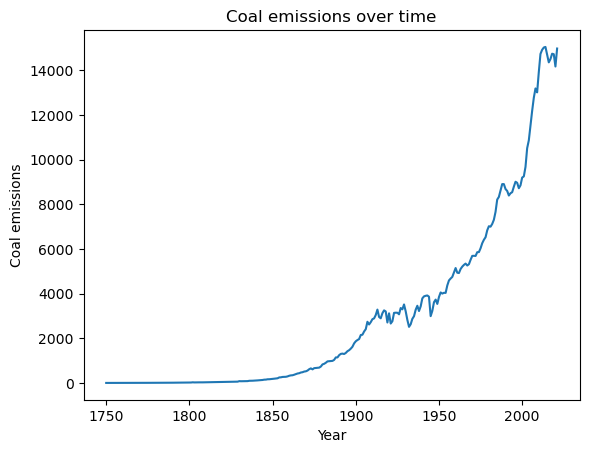

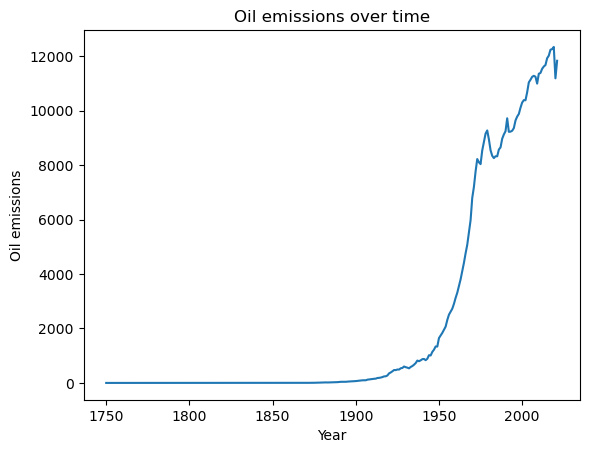

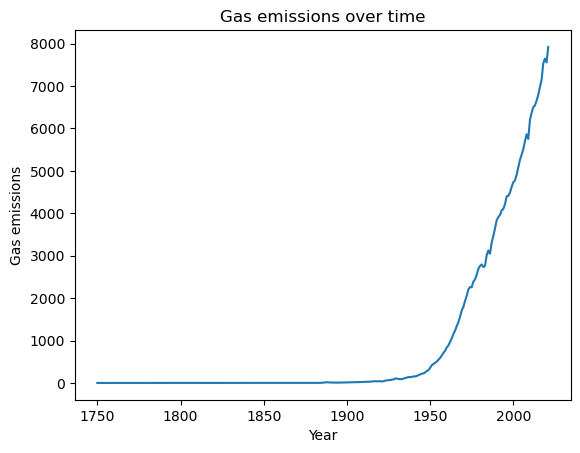

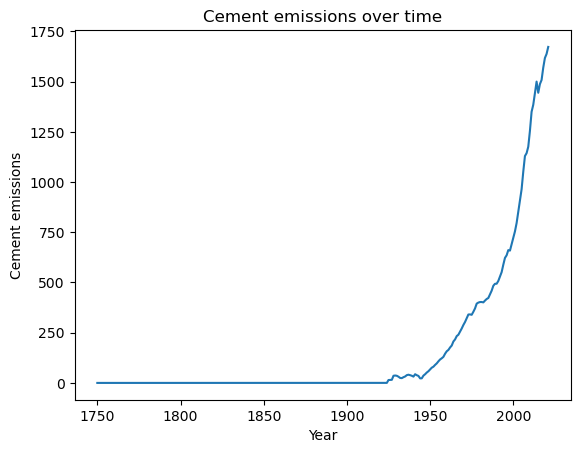

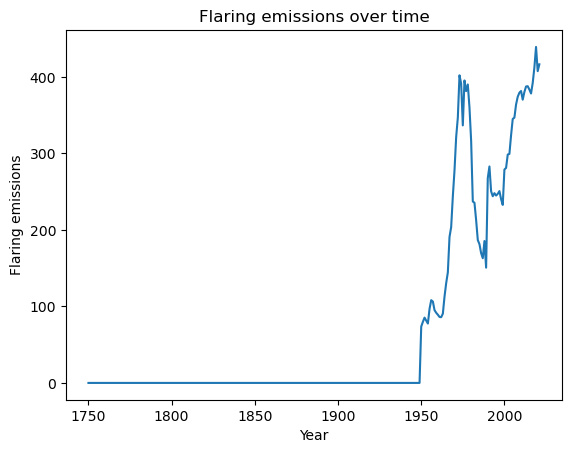

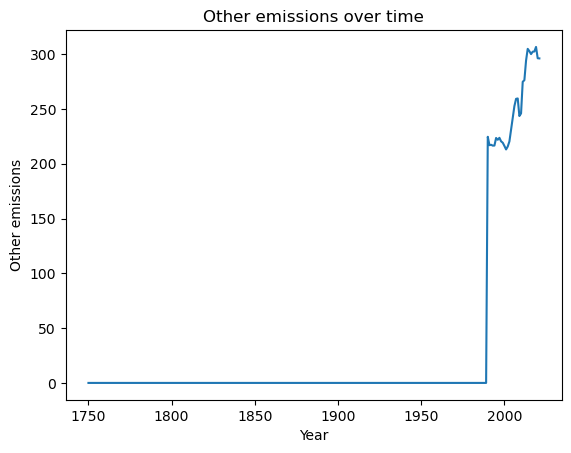

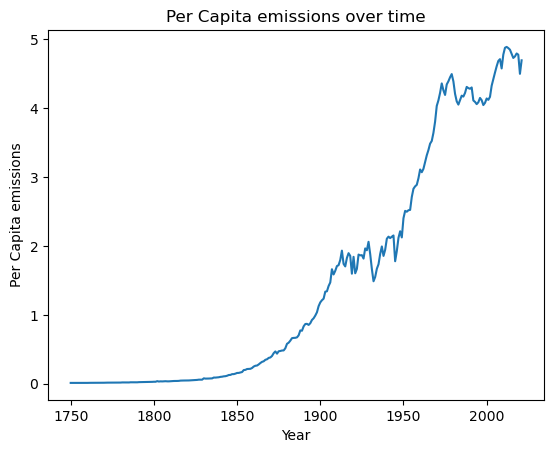

In [6]:
emissions_data_Global = emissions_data_clean[emissions_data_clean["Country"]== "Global"]
for i in range(len(emissions_data.columns)):
    if i > 2:
        plt.plot(emissions_data_Global['Year'], emissions_data_Global[emissions_data.columns[i]])
        plt.xlabel('Year')
        plt.ylabel(emissions_data.columns[i] + " emissions")
        plt.title(emissions_data.columns[i] + " emissions over time") # replace country_name with desired country name
        plt.show()


## Further Charts

The Chart below orders countries based on the sum of their total emissions. We also calculated the share of emissions that belonged to the top 10 emitters (including International Transport) in the code below and found that only 9 countries (plus international transport) were responsible for 67% of the total emissions. This is useful for determining the inequality that exists between states and in time (as we saw in the previous graphs). Once the data on urbanization is obtained we can compare these inequalities with the inequalities present in terms of urban planning (walkability, density, household size) to determine the extent of the relationship between these different factors.

In [7]:
emissions_sorted = emissions_data_clean.groupby("Country").sum().sort_values("Total", ascending=False)
top_11 = emissions_sorted.head(11)
top_11


,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,
Global,512856,1.736930e+06,804190.053522,605476.736614,254057.821146,45066.925255,18454.285582,8057.042204,406.597729
USA,424131,4.219069e+05,175444.989793,161275.027109,78542.543572,2795.830555,2421.252825,1427.211353,2252.097216
China,225860,2.493528e+05,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,4899.551490,202.362414
Russia,329109,1.175476e+05,45571.473160,33219.817986,35054.214393,1659.173890,1486.447360,556.504640,803.008475
Germany,438495,9.329050e+04,64665.842957,19852.714039,7177.257730,1206.606673,93.573871,294.508547,1311.383670
United Kingdom,512856,7.850872e+04,56850.597464,13545.630168,7183.232055,523.546615,290.454679,115.259114,1645.530351
Japan,299453,6.671108e+04,24175.925122,33153.129977,7061.825160,2005.370235,15.542080,299.290721,586.279588
India,297486,5.710539e+04,37018.082763,14798.262507,2482.896938,2624.326360,181.820000,0.000000,58.111284
International Transport,142956,4.306267e+04,0.000000,43062.671846,0.000000,0.000000,0.000000,0.000000,0.000000


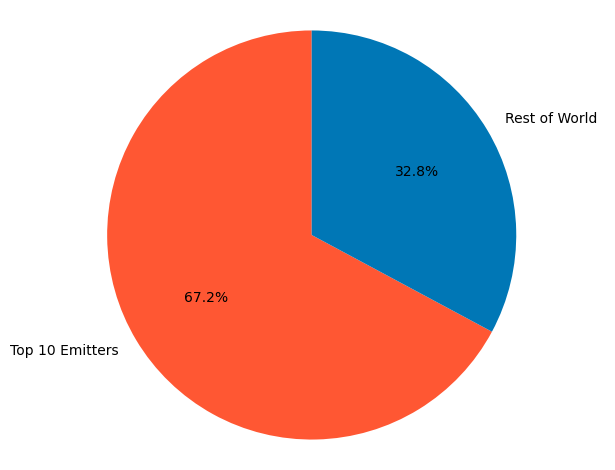

In [26]:
share_of_top_10 = top_11.iloc[1:10]['Total'].sum()/ top_11.loc['Global']['Total'] 
share_of_top_10

labels = 'Top 10 Emitters', 'Rest of World'
sizes = [share_of_top_10, 1-share_of_top_10]
colors = ['#FF5733','#0077b6']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, startangle=90, frame = True, autopct = '%1.1f%%') 
fig = plt.gcf()
ax1.axis('equal')  
ax1.axis('off')
plt.tight_layout()
plt.show()


The charts below are useful for once again proving how skewed the emissions have been. This is proven not only through its leftward skewedness, but also through the logarithmic x axis that had to be implemented in order to render the graph legible. This logarithmic scale is often use to display a great range of values in a relatively smaller space, by "logging" all the x values to make them smaller, whilst keeping their relative size. In this case, the log axis is necessary because recent emissions from all sources is so much larger recently than it was at the beginning of the records.

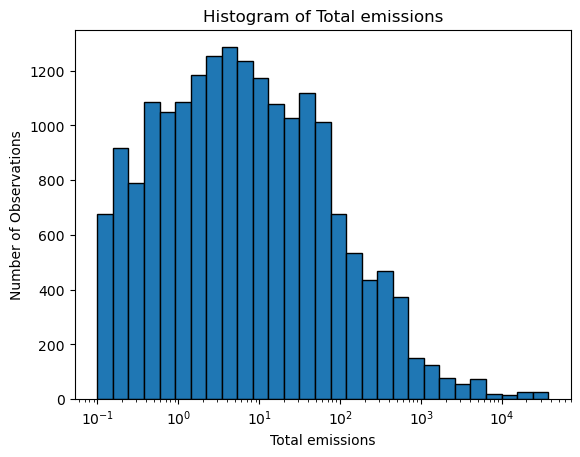

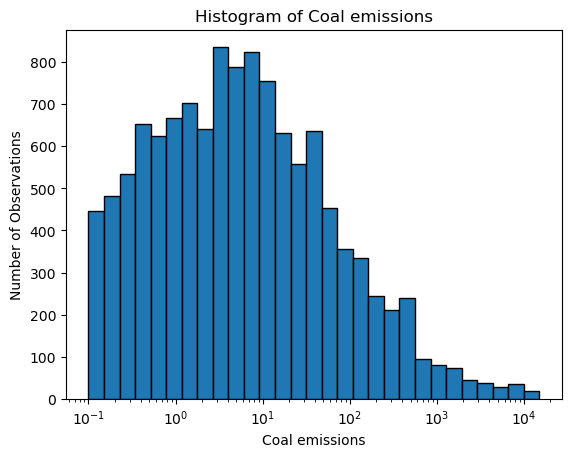

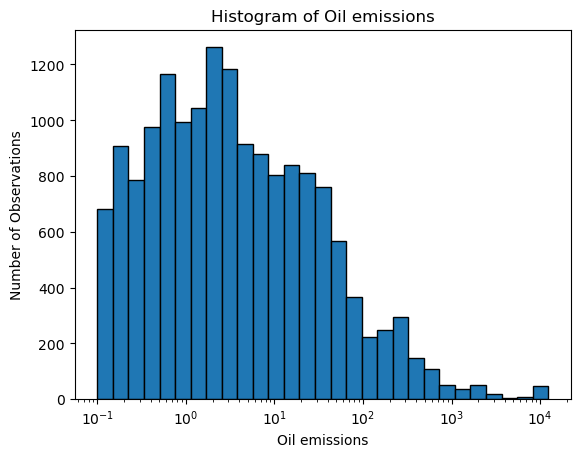

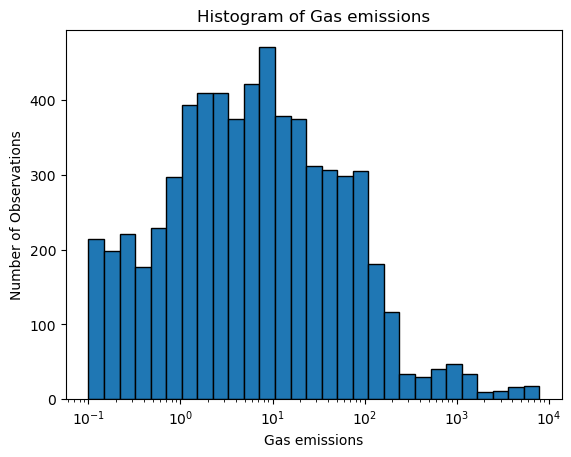

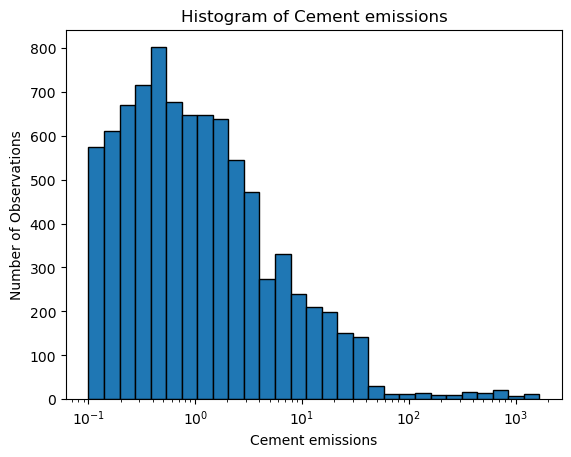

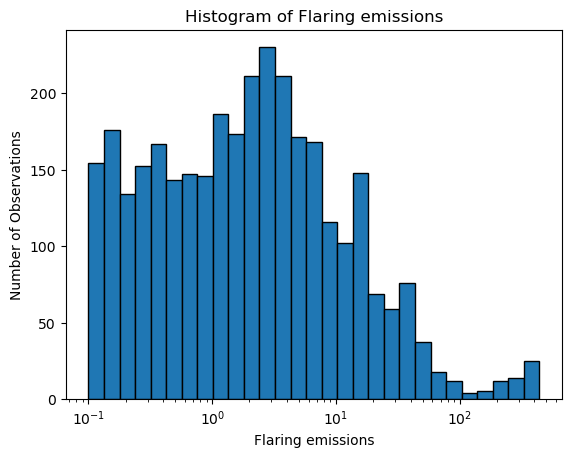

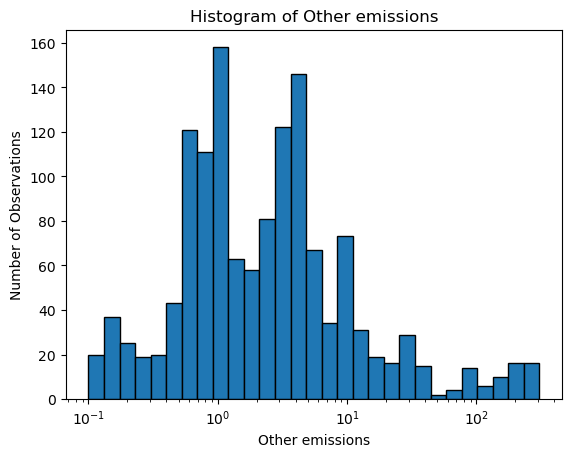

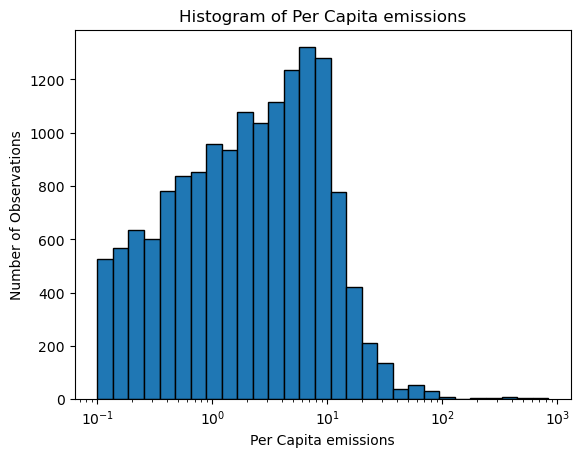

In [9]:
for i in range(len(emissions_data.columns)):
    if i > 2:
        emissions = emissions_data_clean[emissions_data_clean.columns[i]]
        bins = np.logspace(np.log10(0.1), np.log10(max(emissions_data_clean[emissions_data_clean.columns[i]])), 30)
        plt.hist(emissions, bins = bins, edgecolor='black')
        plt.xlabel(emissions_data.columns[i]+ ' emissions')
        plt.ylabel("Number of Observations")
        plt.title("Histogram of " + emissions_data.columns[i] + " emissions") # replace country_name with desired country name
        plt.xscale('log')
        plt.show()

The chart below, helps us to visualize the changing sources of total emissions. For about 200 years, we can see that coal was the main source of emissions and by a large margin, but from around 1970 to 2000 there was a boom in oil emissions, most likely related to political events and the growing awareness of coal's consequences. However, once the 2000's hit we can again see a jump in coal emissions as a percentage of the total emissions. What nations were behind this increase in coal emissions?

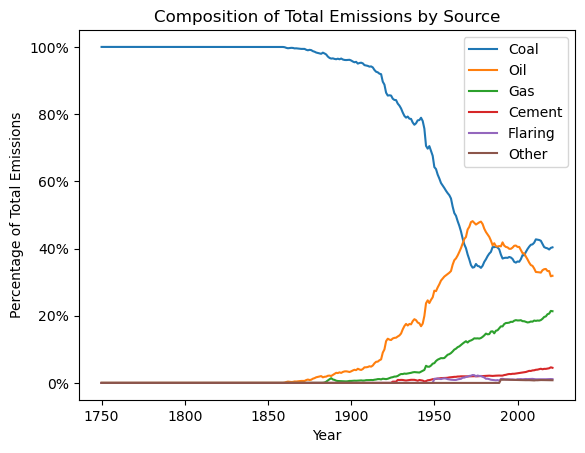

In [10]:
emissions_filtered = emissions_data_Global[['Total','Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']]

emissions_filtered = emissions_filtered.iloc[:, 1:].div(emissions_filtered.Total, axis=0) * 100

emissions_filtered = emissions_filtered.assign(Year=emissions_data_Global['Year'])

emissions_filtered.plot(x='Year', y=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other'], kind='line')

plt.title("Composition of Total Emissions by Source")

plt.ylabel("Percentage of Total Emissions")

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


The table below shows the countries that have had the highest increases in coal emissions since 2000. *In future papers we will also account for total coal emissions, given some of these countries may have increased from 4 tons to 14 tons which is a significant increase but does not impact global emissions significantly.*

In [11]:
emissions_2000_2021 = emissions_data_clean[(emissions_data_clean['Year'] == 2000) | (emissions_data_clean['Year'] == 2021)].groupby(['Country'], as_index=False).agg({'Coal': 'sum'})
emissions_2000_2021 = emissions_2000_2021.merge(emissions_data_clean[emissions_data_clean['Year'] == 2000][['Country', 'Coal']], on='Country', suffixes=('_2021', '_2000'))
emissions_2000_2021 = emissions_2000_2021[['Country', 'Coal_2000', 'Coal_2021']]

emissions_2000_2021['% change 2000-2021'] = (emissions_2000_2021['Coal_2021'] - emissions_2000_2021['Coal_2000']) / emissions_2000_2021['Coal_2000'] * 100

emissions_diff = emissions_2000_2021[['Country', '% change 2000-2021']]

mask = emissions_diff['% change 2000-2021'] < 1000000 
emissions_filtered = emissions_diff[mask]
emissions_filtered = emissions_filtered.sort_values(by='% change 2000-2021', ascending=False)
top_30 = emissions_filtered.head(30)
top_30




,Country,% change 2000-2021
187,Sri Lanka,165847.953057
0,Afghanistan,114725.327511
106,Laos,37474.937971
195,Tajikistan,11792.649199
116,Madagascar,5713.226710
144,Nigeria,2097.475437
153,Panama,1855.015128
57,Dominican Republic,1842.532836
16,Bangladesh,1185.298558
118,Malaysia,1089.636543


Finally, to prove our "hypothesis" that each emission source was positively correlated with a total emissions, a regression was run in order to illustrate the positive causal relationship. This relationship can be determined by simply looking at the slope of the linear regression. A future step for this would be to make a one for one comparison, that is, if coal emissions increased by a metric ton, how much do total emissions increase? Although the answer might seem obvious, further study is required to determine whether emission sources are collinear with each other.

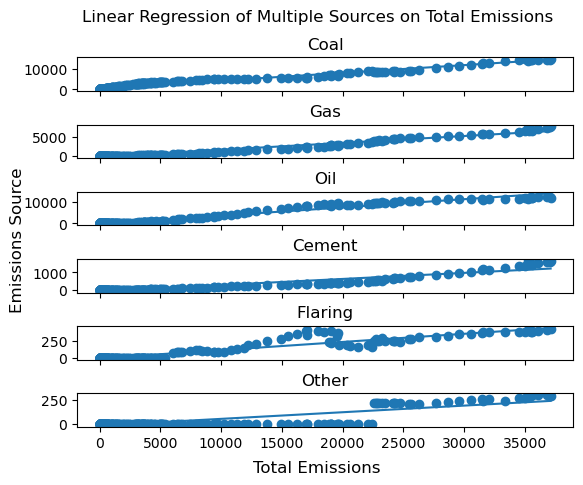

In [12]:
sources = ['Coal', 'Gas', 'Oil', 'Cement', 'Flaring', 'Other']

fig, axs = plt.subplots(len(sources), sharex=True)

for i, source in enumerate(sources):
    x = emissions_data_Global['Total']
    y = emissions_data_Global[source]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    axs[i].scatter(x, y)
    axs[i].plot(x, x * slope + intercept, '-')
    axs[i].set_title(source)
    
fig.suptitle("Linear Regression of Multiple Sources on Total Emissions")
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)
fig.supxlabel('Total Emissions')
fig.supylabel('Emissions Source')


plt.show()


## Conclusion

In this introductory paper examining the different emission sources, we are able to confirm previous knowledge pertaining to the distribution of emissions throughout the years and among countries; namely that more emissions have been released in the past 50 years than have been released in the past 200 years before 1950. For countries we were also able to conclude that the top 10 emitters (including international transport) were responsible for around 67% of the total emissions.

The difference in the distribution of total emissions has also been displayed and has helped us to see that coal was responsible for the most emissions out of all sources up until around the 1960's to 1970's, when oil took over. Nevertheless, this trend reversed in the early 2000's when a host of countries began increasing their coal emissions, among them China, India, Pakistan and Indonesia, four of the most populated countries, with China and India being two of the top ten total emitters since the records started. Any initiatives, seeking to reduce carbon emissions should target these countries and help to develop different ways to achieve economic growth without increasing total emissions.

The next steps for ultimately answering the question of urban planning effects on carbon emissions and on global warming as a whole, time series data for the countries is also required. One potential problem will be that most of the data pertaining to urban planning is usually collected on a per city basis which may require either amalgamating each country's biggest cities and compare that to the national emissions or using city emissions instead of this dataset.
